In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#read the dataset
dataset = pd.read_csv("CM.csv")
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


# New Section

In [ ]:
#separate X and target
X = dataset.iloc[:,:8].values
y = dataset.iloc[:,-1].values

In [ ]:
print(X)

[[6.1900000e+02 4.2000000e+01 2.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [6.0800000e+02 4.1000000e+01 1.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [5.0200000e+02 4.2000000e+01 8.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [8.1100000e+02 4.4000000e+01 3.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 7.8439730e+04]
 [5.8700000e+02 6.2000000e+01 7.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 6.7769200e+03]
 [8.1100000e+02 2.8000000e+01 4.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 9.9034200e+03]]


In [ ]:
print(y[0:5])

[1 0 1 0 0]


In [ ]:
# for our validation, convert X and y to dataframe and check the columns
df = pd.DataFrame(X)
df.head()

# observe X has 0 to 7 columns , so total of 8  columns in X

,0,1,2,3,4,5,6,7
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10


In [ ]:
df=pd.DataFrame(y)
df.head()
# y has only target

,0
0,1
1,0
2,1
3,0
4,0


In [ ]:
# apply train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
#build your keras ANN model
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Defining the ANN model
model = Sequential()
# Adding the first hidden layer, by passing X with 8 features
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))

# Adding the second hidden layer
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
#model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 36        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = 2, epochs = 10)

Epoch 1/10
400/400 [==============================] - 1s 1ms/step - loss: 0.5750 - accuracy: 0.7910
Epoch 2/10
400/400 [==============================] - 1s 1ms/step - loss: 0.5487 - accuracy: 0.7947
Epoch 3/10
400/400 [==============================] - 0s 1ms/step - loss: 0.5429 - accuracy: 0.7997
Epoch 4/10
400/400 [==============================] - 1s 1ms/step - loss: 0.5273 - accuracy: 0.7997
Epoch 5/10
400/400 [==============================] - 1s 1ms/step - loss: 0.5288 - accuracy: 0.7997
Epoch 6/10
400/400 [==============================] - 1s 1ms/step - loss: 0.5340 - accuracy: 0.7997
Epoch 7/10
400/400 [==============================] - 1s 1ms/step - loss: 0.5245 - accuracy: 0.7997
Epoch 8/10
400/400 [==============================] - 1s 1ms/step - loss: 0.5238 - accuracy: 0.7997
Epoch 9/10
400/400 [==============================] - 1s 1ms/step - loss: 0.5189 - accuracy: 0.7997
Epoch 10/10
400/400 [==============================] - 1s 1ms/step - loss: 0.5238 - accuracy: 0.7997

In [ ]:
y_pred = model.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [ ]:
print(y_pred[10:20])

[[0.09151734]
 [0.08407079]
 [0.14211297]
 [0.1275535 ]
 [0.23281093]
 [0.28041297]
 [0.04641091]
 [0.29277256]
 [0.13636497]
 [0.1219575 ]]


In [ ]:
print(y_test[10:20])

[0 0 0 0 0 0 1 0 0 0]


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_train, y_train)
print("Train Loss:", loss)
print("Train Accuracy:", accuracy)

25/25 [==============================] - 0s 1ms/step - loss: 0.5266 - accuracy: 0.7997
Train Loss: 0.526576042175293
Train Accuracy: 0.7997496724128723


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, np.round(y_pred))
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[156   0]
 [ 44   0]]


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

7/7 [==============================] - 0s 2ms/step - loss: 0.5859 - accuracy: 0.7800
Test Loss: 0.5859289169311523
Test Accuracy: 0.7799999713897705


In [ ]:
#ML techniques: SVC-Support Vector Classification
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import hinge_loss
clf = LinearSVC(C=1,loss="hinge")
clf.fit(X_train, y_train)
print("Train loss:",loss)
print("train accuracy:",accuracy)

# Make predictions on the testing set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
decision_scores = clf.decision_function(X_test)
loss, accuracy = model.evaluate(X_train, y_train)

print("Test Accuracy:", accuracy)
# Calculate the hinge loss
avg_hinge_loss = hinge_loss(y_test, decision_scores)
print("Test Loss:", avg_hinge_loss)

Train loss: 0.5859289169311523
train accuracy: 0.775
25/25 [==============================] - 0s 1ms/step - loss: 0.5266 - accuracy: 0.7997
Test Accuracy: 0.7997496724128723
Test Loss: 0.6157728969132144


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
#ML techniques: SVC-Support Vector Classification-2 using Standard scaler to center the training set around mean
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import hinge_loss
clf = Pipeline([("scaler", StandardScaler()),("linear_svc",LinearSVC(C=1,loss="hinge")),])
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracy:", accuracy)
decision_scores = clf.decision_function(X_test)

# Calculate the hinge loss
avg_hinge_loss = hinge_loss(y_test, decision_scores)
print("Test Loss:", avg_hinge_loss)

Test Accuracy: 0.78
Test Loss: 0.44000000000006767


In [ ]:
#ML techniques: Nonlinear SVC-Support Vector Classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import hinge_loss
clf = Pipeline([("scaler", StandardScaler()),("svm_clf",SVC(kernel="rbf",gamma=5,C=1)),])
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracy:", accuracy)
decision_scores = clf.decision_function(X_test)

# Calculate the hinge loss
avg_hinge_loss = hinge_loss(y_test, decision_scores)
print("Test Loss:", avg_hinge_loss)

Test Accuracy: 0.78
Test Loss: 0.5724151885384846


In [ ]:
#ML techniques: Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
y_train_pred = clf.predict(X_train)
trainaccuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", trainaccuracy)
print("Test Accuracy:", accuracy)

Train Accuracy: 0.7909887359198998
Test Accuracy: 0.765


In [ ]:
#ML techniques: Linear Discrminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import hinge_loss
# Create an instance of LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracy:", accuracy)


Test Accuracy: 0.825


In [ ]:
#ML techniques: Linear Discrminant Analysis with Nonlinear SVC classifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import hinge_loss
# Create an instance of LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

# Fit the LDA model on the training data
lda.fit(X_train, y_train)

# Transform the data using the LDA model
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)
clf = Pipeline([("scaler", StandardScaler()),("svm_clf",SVC(kernel="rbf",gamma=5,C=1)),])
clf.fit(X_train_lda, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test_lda)
accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracy:", accuracy)
decision_scores = clf.decision_function(X_test_lda)

# Calculate the hinge loss
avg_hinge_loss = hinge_loss(y_test, decision_scores)
print("Test Loss:", avg_hinge_loss)

Test Accuracy: 0.835
Test Loss: 0.3536984461120886


In [ ]:
# ANN model to Logistic Regression
model = Sequential()
# Adding the first hidden layer, by passing X with 8 features
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid', input_dim = 8))



# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 32, epochs = 10)
y_pred = model.predict(X_test)
model.summary()
# Evaluate the model
loss, accuracy = model.evaluate(X_train, y_train)
print("Train Loss:", loss)
print("Train Accuracy:", accuracy)
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
25/25 [==============================] - 0s 1ms/step - loss: 982.8394 - accuracy: 0.4969
Epoch 2/10
25/25 [==============================] - 0s 1ms/step - loss: 267.6793 - accuracy: 0.6421
Epoch 3/10
25/25 [==============================] - 0s 1ms/step - loss: 38.2830 - accuracy: 0.6821
Epoch 4/10
25/25 [==============================] - 0s 1ms/step - loss: 8.9386 - accuracy: 0.6608
Epoch 5/10
25/25 [==============================] - 0s 1ms/step - loss: 7.7789 - accuracy: 0.7046
Epoch 6/10
25/25 [==============================] - 0s 1ms/step - loss: 16.7860 - accuracy: 0.6583
Epoch 7/10
25/25 [==============================] - 0s 1ms/step - loss: 4.3395 - accuracy: 0.7071
Epoch 8/10
25/25 [==============================] - 0s 1ms/step - loss: 6.2424 - accuracy: 0.6809
Epoch 9/10
25/25 [==============================] - 0s 1ms/step - loss: 5.9734 - accuracy: 0.7071
Epoch 10/10
7/7 [==============================] - 0s 2ms/step
Model: "sequential_1"
___________________________

Epoch 1/10
25/25 [==============================] - 0s 2ms/step - loss: 117064544.0000
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6627
Epoch 3/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6440
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6281
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6155
Epoch 6/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6024
Epoch 7/10
25/25 [==============================] - 0s 2ms/step - loss: 0.5915
Epoch 8/10
25/25 [==============================] - 0s 1ms/step - loss: 0.5829
Epoch 9/10
25/25 [==============================] - 0s 1ms/step - loss: 0.5735
Epoch 10/10
25/25 [==============================] - 0s 1ms/step - loss: 0.5658


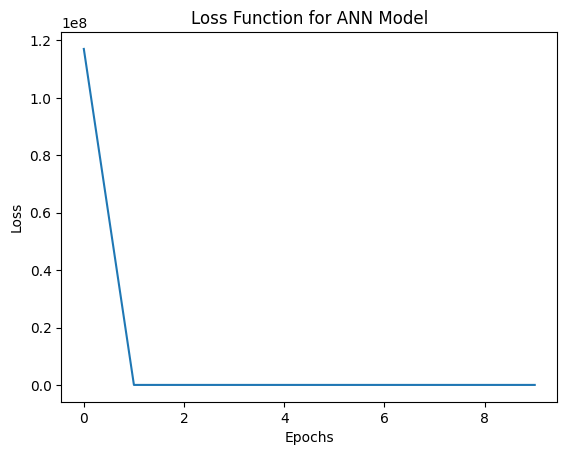

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Load and preprocess Churn Modeling dataset
# Assuming you have 'X_train', 'X_test', 'y_train', 'y_test' loaded and preprocessed

# Define a function to create and train an ANN model
def create_ann_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dense(1, activation='sigmoid')
    ])
    return model

# Define training parameters
learning_rate = 0.01
epochs = 10
loss_function = 'binary_crossentropy'
optimizer = SGD(learning_rate)

# Train the Neural Network using TensorFlow
input_dim = X_train.shape[1]
ann_model = create_ann_model(input_dim)
ann_model.compile(loss=loss_function, optimizer=optimizer)
history = ann_model.fit(X_train, y_train, epochs=epochs, verbose=1)

# Plot loss function graph for each epoch
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function for ANN Model')
plt.show()